
# K-Means Clustering
---
## 1. What is Clustering?

**Clustering** is an **unsupervised learning** technique where:
- We do **NOT** have labels
- We want to group **similar data points**
- Similarity is defined using a **distance metric**

### Real-world motivation
- Customer segmentation
- Student grouping (CGPA, IQ, age)
- Image compression
- Document clustering
- Market basket analysis

---

## 2. Problem Statement (Used Throughout)

We are given student data with:
- $x_1$ = CGPA  
- $x_2$ = IQ  

Goal:
> Group students into **similar clusters** for placement strategy.

We **do not know labels** and **do not know how many clusters** initially.

---

## 3. Why K-Means?

K-Means is:
- Simple
- Fast
- Scalable
- Geometry-based
- Works well when clusters are **compact and spherical**

---

## 4. K-Means Algorithm — Step by Step

### Step 1: Decide Number of Clusters $K$

- This is the **hardest part**
- Initially chosen manually
- Later optimized using **Elbow Method**

Example:
$$
K = 3
$$

---

### Step 2: Initialize Centroids

Centroids are **cluster centers**.

Initialization methods:
- Random data points
- Random values
- K-Means++ (better, but concept later)

Let initial centroids be:
$$
C_1, C_2, C_3
$$

---

### Step 3: Assign Each Point to Nearest Centroid

Distance metric used:
### **Euclidean Distance**
$$
d(x, C_j) = \sqrt{(x_1 - c_{j1})^2 + (x_2 - c_{j2})^2}
$$

Assignment rule:
$$
Cluster(x) = \arg\min_j d(x, C_j)
$$

Each point goes to the **closest centroid**.

---

### Step 4: Move (Update) Centroids

New centroid = **mean of all points assigned to that cluster**

For cluster $k$:
$$
C_k = \frac{1}{|S_k|} \sum_{x \in S_k} x
$$

This step **moves centroids toward dense regions**.

---

### Step 5: Repeat Until Convergence

Repeat:
1. Assign clusters
2. Update centroids

Stop when:
- Centroids do **not move**
- OR cluster assignments do not change

This is called **convergence**.

---

## 5. Why K-Means Converges?

Because it minimizes the objective function:

## **Within Cluster Sum of Squares (WCSS)**

$$
WCSS = \sum_{k=1}^{K} \sum_{x \in S_k} \|x - C_k\|^2
$$

Each iteration **reduces WCSS**, so convergence is guaranteed.

---

## 6. Geometry Intuition (Very Important)

- Clusters are **Voronoi regions**
- Decision boundaries are **straight lines**
- Centroids move toward **mass center**
- Distance defines ownership

---

## 7. Major Limitation: Choosing $K$

If:
- $K$ too small → **Underfitting**
- $K$ too large → **Overfitting**

So how do we choose $K$?

---

## 8. Elbow Method — Core Idea

We compute WCSS for different $K$ values.

### Procedure:
1. Run K-Means for $K = 1$ to $K = n$
2. Compute WCSS for each $K$
3. Plot:
$$
K \; vs \; WCSS
$$

---

## 9. Why WCSS Always Decreases?

Important property:
$$
WCSS_1 > WCSS_2 > WCSS_3 > \dots
$$

Why?
- More clusters → points closer to centroids
- Extreme case: $K = N$, WCSS = 0

---

## 10. Elbow Point (Critical Concept)

The **elbow point** is where:
- WCSS reduction **slows down sharply**
- Diminishing returns start

Graph intuition:
- Steep drop initially
- Curve flattens later
- Elbow = best tradeoff

---

## 11. Intuition Analogy (From Lecture)

> Imagine rolling down a hill:
- First part → very steep
- Later → almost flat

The point where steepness reduces = **Elbow**

---

## 12. Final Selection of $K$

Choose:
$$
K = \text{Elbow Point}
$$

Because:
- Before elbow → big gains
- After elbow → marginal gains

---

## 13. Full Algorithm Summary

1. Choose $K$
2. Initialize centroids
3. Assign points using distance
4. Update centroids using mean
5. Repeat until convergence
6. Use Elbow Method to validate $K$

---

## 14. Important Assumptions of K-Means

- Clusters are spherical
- Similar sizes
- Distance metric meaningful
- Numeric features
- Sensitive to scale (use normalization)

---

## 15. Common Pitfalls

- Bad initialization
- Wrong $K$
- Outliers affect centroids
- Non-spherical clusters
- Different density clusters

---

## 16. Interview One-Liners

- *K-Means minimizes WCSS*
- *Elbow method identifies diminishing returns*
- *Centroids are means*
- *Unsupervised learning*
- *Distance-based clustering*

---

## 17. Final Takeaway

K-Means is:
- Simple
- Powerful
- Geometry-driven
- Requires careful $K$ selection

Elbow method provides a **practical heuristic**, not a guarantee.



In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


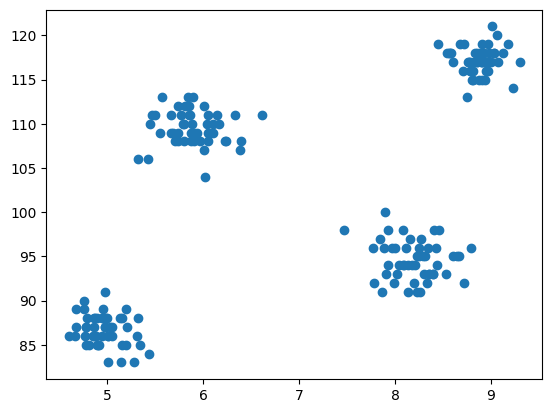

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [3]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [4]:

wcss

[29957.898287999997,
 4184.141269999999,
 2364.0055834200834,
 681.9696600000001,
 514.1616803171117,
 427.9627769877217,
 302.5473746759042,
 278.05695044088003,
 206.93812936151184,
 192.19130086062057]

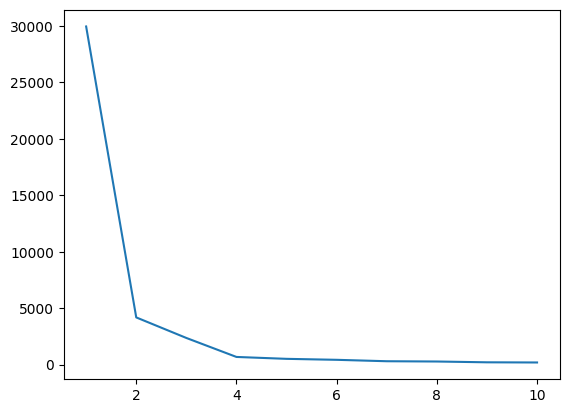

In [5]:
plt.plot(range(1,11),wcss)

In [6]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
y_means

array([3, 0, 1, 1, 0, 0, 1, 2, 0, 1, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 1, 3,
       1, 3, 3, 1, 3, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 3, 0, 3, 1, 1, 3,
       2, 2, 1, 0, 2, 0, 3, 3, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 3, 2,
       1, 3, 0, 1, 0, 2, 1, 3, 0, 2, 0, 2, 3, 1, 1, 2, 0, 3, 2, 3, 2, 0,
       2, 0, 2, 2, 1, 3, 1, 1, 2, 1, 3, 2, 0, 3, 3, 2, 3, 3, 1, 3, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 0, 2, 3, 3, 0, 1, 2, 1, 3, 1, 0, 3, 1, 1, 0,
       3, 3, 0, 2, 0, 3, 1, 1, 1, 3, 0, 3, 3, 2, 3, 2, 0, 3, 2, 3, 2, 2,
       3, 1, 0, 2, 0, 1, 3, 2, 0, 1, 2, 3, 0, 3, 3, 2, 2, 0, 2, 3, 3, 1,
       2, 0, 3, 2, 2, 0, 0, 0, 1, 3, 1, 1, 2, 0, 1, 1, 3, 3, 1, 3, 2, 0,
       0, 2], dtype=int32)

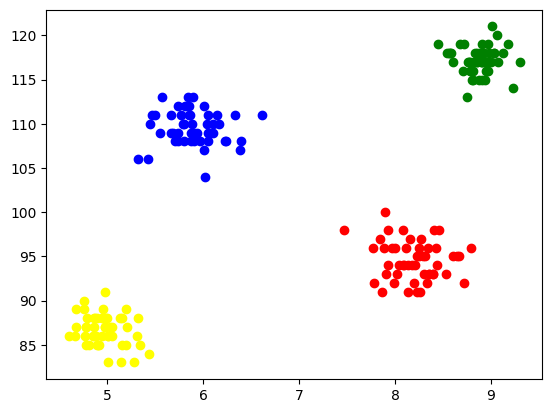

In [7]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

# K-Means on 3-D Data


In [8]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [9]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [10]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

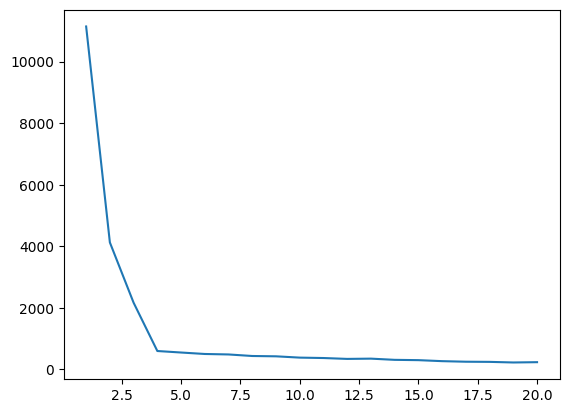

In [11]:
plt.plot(range(1,21),wcss)

In [12]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()